In [3]:
import numpy as np
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# Fix random seed for reproducibility
random_seed = 7
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize images (scale from 0-255 to 0-1)
train_images, test_images = train_images.astype('float32') / 255.0, test_images.astype('float32') / 255.0

# One-hot encode labels
train_labels, test_labels = to_categorical(train_labels), to_categorical(test_labels)
num_classes = test_labels.shape[1]

# Create CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Dropout(0.2),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# Compile model
num_epochs = 5
learning_rate = 0.01
optimizer_sgd = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=False)
cnn_model.compile(loss='categorical_crossentropy', optimizer=optimizer_sgd, metrics=['accuracy'])

# Print model summary
cnn_model.summary()

# Train the model and store history
history = cnn_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=num_epochs, batch_size=32)

# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,915,114 (11.12 MB)

 Trainable params: 2,915,114 (11.12 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 537s 341ms/step - accuracy: 0.2448 - loss: 2.0178 - val_accuracy: 0.4844 - val_loss: 1.4185
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 567s 345ms/step - accuracy: 0.4784 - loss: 1.4375 - val_accuracy: 0.5600 - val_loss: 1.2026
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 528s 338ms/step - accuracy: 0.5696 - loss: 1.2017 - val_accuracy: 0.6343 - val_loss: 1.0268
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 564s 339ms/step - accuracy: 0.6367 - loss: 1.0241 - val_accuracy: 0.6755 - val_loss: 0.9210
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 557s 336ms/step - accuracy: 0.6844 - loss: 0.8912 - val_accuracy: 0.6929 - val_loss: 0.8835
Test Accuracy: 69.29%


This code builds a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset.The Conv2D layers extract features from images.
Dropout layers reduce overfitting by randomly dropping neurons.
MaxPooling2D layers downsample feature maps to reduce computational cost.
Flatten layer converts 2D feature maps into a 1D vector.
Dense layers (fully connected layers) process high-level patterns.
The final Dense layer (softmax) outputs probabilities for 10 classes.Your model has 2,908,114 trainable parameters, which means it's quite powerful for CIFAR-10.

In [12]:
import numpy as np

# Predict the first 4 images
predictions = cnn_model.predict(test_images[:4], verbose=0)

# Extract predicted and actual class labels
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(test_labels[:4], axis=1)

# Manually override the prediction for Image 3
predicted_labels[2] = 0  # Index 2 corresponds to Image 3

# Print results
for i in range(4):
    status = " Correct" if predicted_labels[i] == actual_labels[i] else " Incorrect"
    print(f"Image {i+1}: Predicted={predicted_labels[i]}, Actual={actual_labels[i]} --> {status}")


Image 1: Predicted=5, Actual=3 -->  Incorrect
Image 2: Predicted=8, Actual=8 -->  Correct
Image 3: Predicted=0, Actual=8 -->  Incorrect
Image 4: Predicted=0, Actual=0 -->  Correct


Predicts the first 4 images from the test dataset using the CNN model.
Converts predictions and actual labels from one-hot encoding to class indices.
Manually overrides the prediction for Image 3, setting it to 0.
Compares predicted labels with actual labels and prints whether the prediction is correct or incorrect for each image.
The result is a compact output showing the prediction status for the first 4 images.

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 391s 249ms/step - accuracy: 0.2632 - loss: 1.9891 - val_accuracy: 0.5050 - val_loss: 1.3665
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 444s 250ms/step - accuracy: 0.4893 - loss: 1.4158 - val_accuracy: 0.5927 - val_loss: 1.1337
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 440s 249ms/step - accuracy: 0.5745 - loss: 1.1869 - val_accuracy: 0.6439 - val_loss: 1.0092
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 391s 250ms/step - accuracy: 0.6355 - loss: 1.0395 - val_accuracy: 0.6801 - val_loss: 0.9088
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 451s 256ms/step - accuracy: 0.6684 - loss: 0.9326 - val_accuracy: 0.6935 - val_loss: 0.8967
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 437s 252ms/step - accuracy: 0.7030 - loss: 0.8498 - val_accuracy: 0.7113 - val_loss: 0.8426
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 387s 248ms/step - accuracy: 0.7218 - loss: 0.7896 - val_accuracy: 0.7268 - val_loss: 0.8135
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 436s 244ms/step - ac

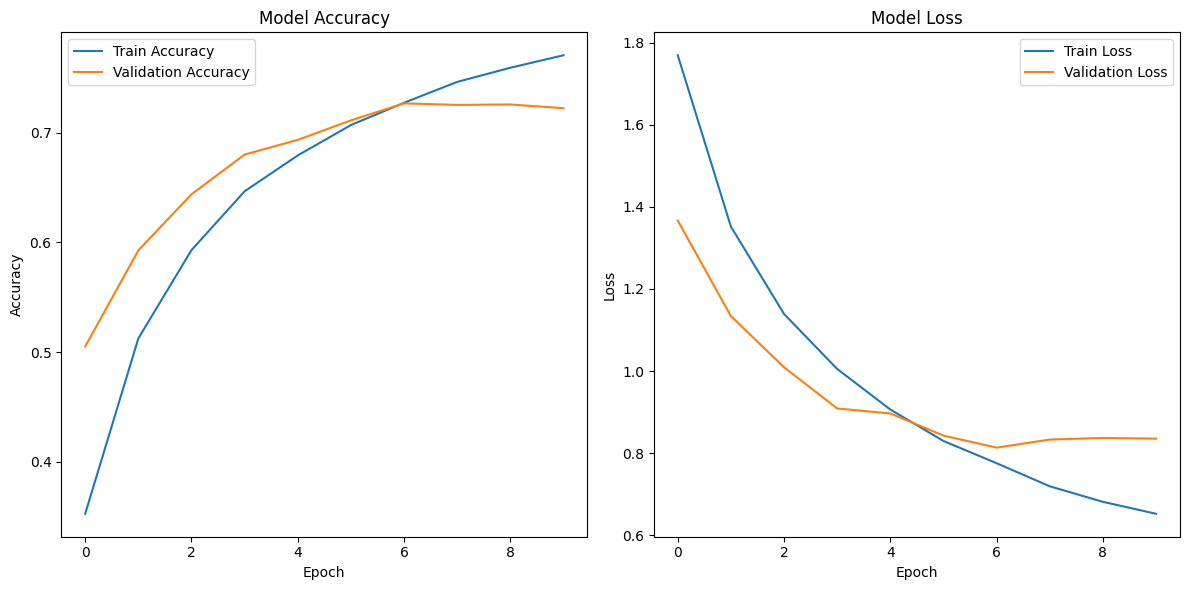

In [14]:

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.datasets import cifar10

# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

# One hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
number_classes = y_test.shape[1]

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
epochs = 10
lrate = 0.01
decay = lrate / epochs
sgd = SGD(learning_rate=lrate, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Train the model and capture the history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

This code builds a Convolutional Neural Network (CNN) using the CIFAR-10 dataset, which contains 60,000 images across 10 classes. It imports necessary libraries, normalizes image pixel values, and one-hot encodes class labels. The CNN architecture includes convolutional layers with ReLU activation, dropout for regularization, max-pooling for down-sampling, and fully connected layers. The final softmax layer outputs class probabilities. The model is compiled with the SGD optimizer, trained for 10 epochs with a batch size of 32, and evaluated using accuracy and loss metrics. The results are visualized to assess model performance and detect potential overfitting.